In [2]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.load("F:\Study Materials\Programming\ML\Datasets\Sign-language-digits-dataset\Sign-language-digits-dataset\X.npy")
Y = np.load("F:\Study Materials\Programming\ML\Datasets\Sign-language-digits-dataset\Sign-language-digits-dataset\Y.npy")
print("The data is loaded from disk.")
print(X.shape)
print(Y.shape)

The data is loaded from disk.
(2062, 64, 64)
(2062, 10)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


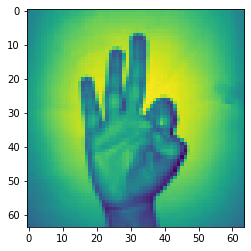

In [56]:
plt.imshow(X[200])
print(Y[200])

In [5]:
Y_new=[]
for item in Y:
    for j in range(0,10):
        if item[j]==1.0:
            Y_new.append(j)
print(np.array(Y_new).shape)

(2062,)


In [6]:
X_new = np.expand_dims(X,3)
#Y_new = np.expand_dims(X,1)

In [17]:
model= keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=(64,64,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               6423040   
__________

In [18]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [19]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('acc')>0.99):
            print("\nReached 99% accuracy so cancelling traing!!!...")
            self.model.stop_training=True
callbacks=myCallback()

In [20]:
history=model.fit(X_new, Y_new, epochs=25,callbacks=[callbacks])

Epoch 1/25
2062/2062 [==============================] - 24s 12ms/step - loss: 2.2157 - acc: 0.2590
Epoch 2/25
2062/2062 [==============================] - 22s 11ms/step - loss: 1.0305 - acc: 0.6828
Epoch 3/25
2062/2062 [==============================] - 23s 11ms/step - loss: 0.6465 - acc: 0.7949
Epoch 4/25
2062/2062 [==============================] - 23s 11ms/step - loss: 0.5162 - acc: 0.8327
Epoch 5/25
2062/2062 [==============================] - 22s 11ms/step - loss: 0.4341 - acc: 0.8613
Epoch 6/25
2062/2062 [==============================] - 22s 11ms/step - loss: 0.3788 - acc: 0.8739
Epoch 7/25
2062/2062 [==============================] - 23s 11ms/step - loss: 0.3072 - acc: 0.9098
Epoch 8/25
2062/2062 [==============================] - 25s 12ms/step - loss: 0.2464 - acc: 0.9253
Epoch 9/25
2062/2062 [==============================] - 24s 12ms/step - loss: 0.2071 - acc: 0.9379
Epoch 10/25
2062/2062 [==============================] - 23s 11ms/step - loss: 0.1469 - acc: 0.9573
Epoch 11/

Text(0.5, 1.0, 'Training loss')

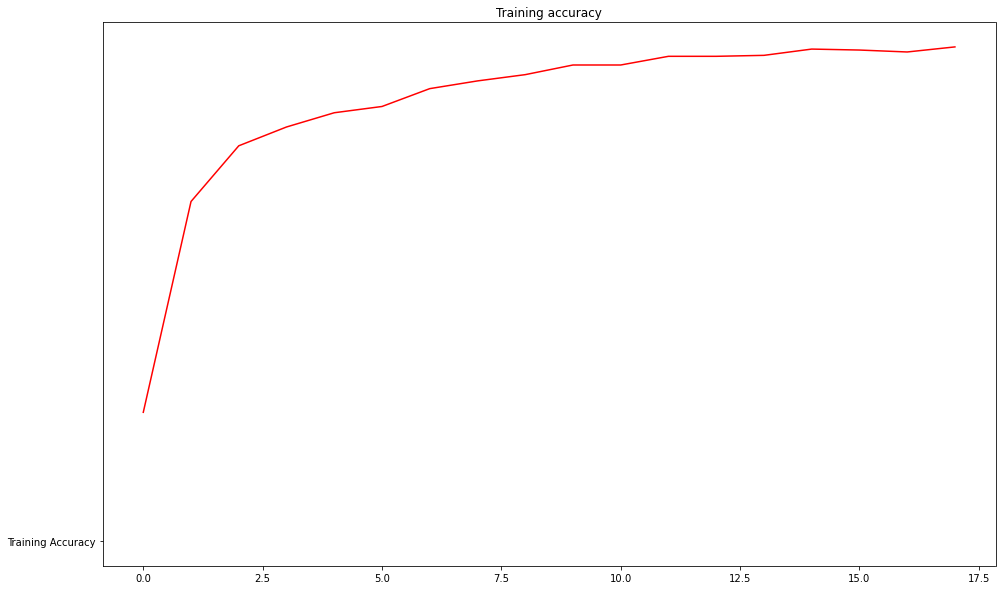

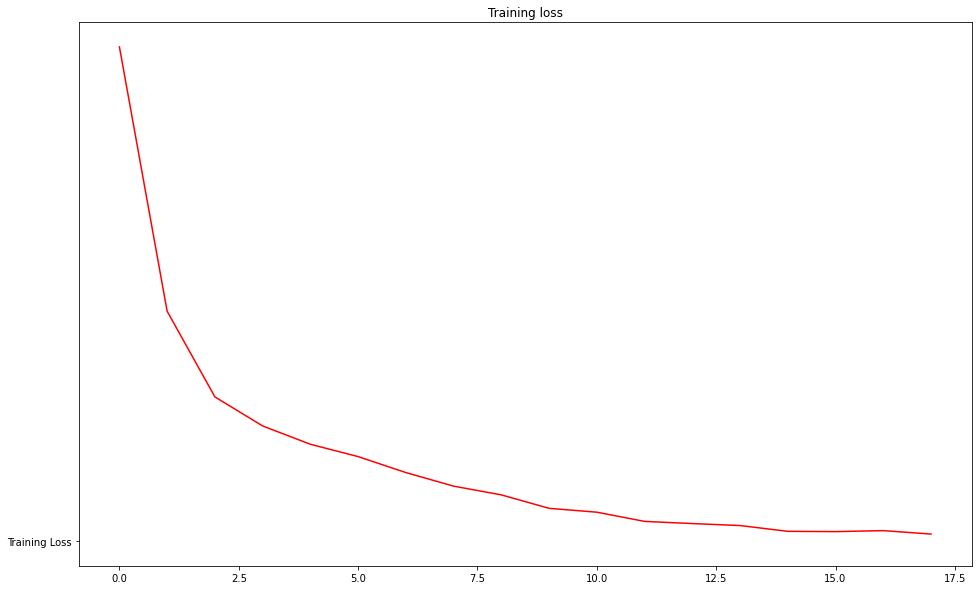

In [22]:
acc=history.history['acc']
loss=history.history['loss']

epochs=range(len(acc)) # Get number of epochs
plt.figure(figsize=(16,10))
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.title('Training accuracy')
plt.figure(figsize=(16,10))

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")


plt.title('Training loss')


In [39]:
predict=model.predict(X_new)

What your NN sees:  0
The reality:  0

Is reality equals to prediction ?
 True


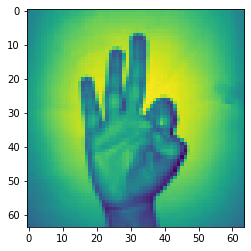

In [57]:
img_index=200
prediction = int(np.where(predict[img_index]==max(predict[img_index]))[0])
print("What your NN sees: ", prediction)
reality = int(np.where(Y[img_index]==max(Y[img_index]))[0])
print("The reality: ", reality)
print("\nIs reality equals to prediction ?\n", reality==prediction)
plt.imshow(X[img_index])